# Parametric and Non-Parametric Test Challenge: What to Use

Using selected questions from the 2012 and 2014 editions of the [European Social Survey](http://www.europeansocialsurvey.org/data/round-index.html), address the following questions. For each question, explain why you chose the approach you did.

Here is the [data file](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv). And here is the [codebook](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html), with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
  
    
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
    
    
3. Who reported watching more TV in 2012, men or women?


4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?


5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?


6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

### Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

### The Dataframe

In [2]:
survey_df = pd.read_csv('ESSdata_Thinkful.csv')

In [4]:
survey_df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [5]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


In [8]:
# I'd like to see if the dataframe's missing any information.

(survey_df.isnull().sum()*100) / survey_df.isnull().count()

cntry      0.000000
idno       0.000000
year       0.000000
tvtot      0.093088
ppltrst    0.162904
pplfair    0.453805
pplhlp     0.290901
happy      0.360717
sclmeet    0.174540
sclact     1.093786
gndr       0.116360
agea       2.781010
partner    0.197812
dtype: float64

In [98]:
# More than half of the variables are missing values and while they're not missing huge amounts of data, the null values
# will be replaced with the appropriate variables' mean.

no_nulls_df = survey_df.copy()

replace_nans_with_means_list = ['tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet', 'sclact', 'gndr', 'agea',
                                 'partner']

for col in replace_nans_with_means_list:
        no_nulls_df.fillna(no_nulls_df[replace_nans_with_means_list].median(), inplace=True)

In [41]:
# Seeing how many countries are in the dataframe.

pd.Series(' '.join(no_nulls_df['cntry']).split()).value_counts()[:50]

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
dtype: int64

### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

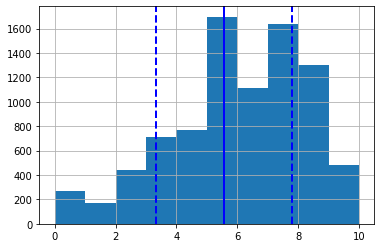

In [31]:
# Looking at the distribution of the target variable.
no_nulls_df['ppltrst'].hist()

# Add a vertical line at the mean.
plt.axvline(no_nulls_df['ppltrst'].mean(), color='b', linestyle='solid', linewidth=2)

# Add a vertical line at one standard deviation above the mean.
plt.axvline(no_nulls_df['ppltrst'].mean() + no_nulls_df['ppltrst'].std(), color='b', linestyle='dashed', linewidth=2)

# Add a vertical line at one standard deviation below the mean.
plt.axvline(no_nulls_df['ppltrst'].mean()-no_nulls_df['ppltrst'].std(), color='b', linestyle='dashed', linewidth=2) 

# Print the histogram.
plt.show()

In [34]:
# Making a standard normally distributed variable.
norm = np.random.normal(0, 1, 8594)

# Sorting the values in ascending order.
norm.sort()

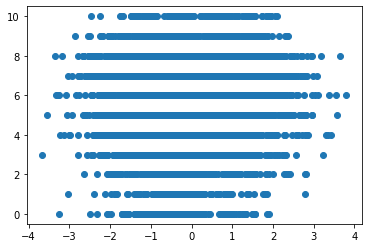

In [35]:
# Plotting the trust variable against norm in qqplots.
plt.plot(norm, no_nulls_df['ppltrst'], 'o') 
plt.show() 

The QQ plot showed the trust variable isn't normally distributed, so I'll use the Kruskal-Wallace test (which is a non-parametric test) to compare trust levels.

In [48]:
survey_df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [52]:
# Running the Kruskal-Wallis test.

# Print the test statistic followed by the probability of getting this result if the groups were not different.
stats.kruskal(no_nulls_df['year'], no_nulls_df['ppltrst'])

KruskalResult(statistic=764.0742336053293, pvalue=3.492963354811627e-168)

Because the p-value is nearly zero, the level of trust in people was significantly different between 2012 and 2014.

### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

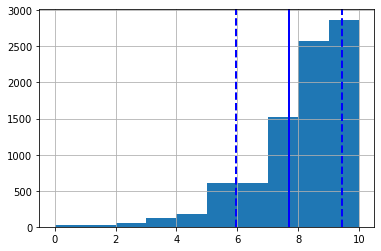

In [64]:
# Looking at the distribution of the target variable.
no_nulls_df['happy'].hist()

# Add a vertical line at the mean.
plt.axvline(no_nulls_df['happy'].mean(), color='b', linestyle='solid', linewidth=2)

# Add a vertical line at one standard deviation above the mean.
plt.axvline(no_nulls_df['happy'].mean() + no_nulls_df['happy'].std(), color='b', linestyle='dashed', linewidth=2)

# Add a vertical line at one standard deviation below the mean.
plt.axvline(no_nulls_df['happy'].mean()-no_nulls_df['happy'].std(), color='b', linestyle='dashed', linewidth=2) 

# Print the histogram.
plt.show()

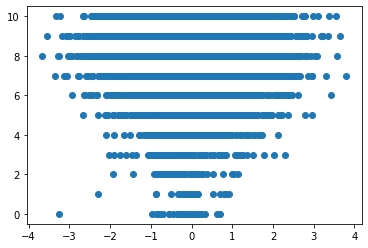

In [54]:
# Confirming the distribution of the target variable.

plt.plot(norm, no_nulls_df['happy'], 'o') 
plt.show() 

In [55]:
# Running the Kruskal-Wallis test.

# Print the test statistic followed by the probability of getting this result if the groups were not different.
stats.kruskal(no_nulls_df['year'], no_nulls_df['happy'])

KruskalResult(statistic=4465.110398461023, pvalue=0.0)

Because the p-value's zero, there was a statistically significant difference in happiness between 2012 and 2014.

### 3. Who reported watching more TV in 2012, men or women?

_Looking at the Data for Males_

In [100]:
male_df = no_nulls_df[['year', 'gndr', 'tvtot']]

In [113]:
# Dropping the year 2014.

index_names = male_df[male_df['year'] == 7].index

male_df.drop(index_names, inplace=True)

In [114]:
# Dropping females from the dataframe.

index_names = male_df[male_df['gndr'] == 2].index

male_df.drop(index_names, inplace=True)

In [139]:
male_df.describe()

,year,gndr,tvtot
count,2154.0,4326.0,4326.000000
mean,6.0,1.0,3.831946
std,0.0,0.0,2.005589
min,6.0,1.0,0.000000
25%,6.0,1.0,2.000000
50%,6.0,1.0,4.000000
75%,6.0,1.0,5.000000
max,6.0,1.0,7.000000


In [133]:
# Making a standard normally distributed variable.
norm = np.random.normal(0, 1, 4326)

# Sorting the values in ascending order.
norm.sort()

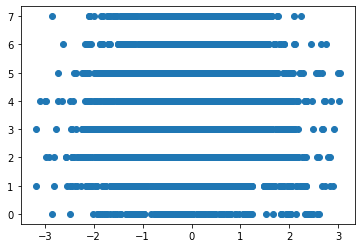

In [134]:
# Confirming the distribution of the target variable.

plt.plot(norm, male_df['tvtot'], 'o') 
plt.show() 

_Looking at the Data for Females_

In [116]:
female_df = no_nulls_df[['year', 'gndr', 'tvtot']]

In [118]:
# Dropping the year 2014.

index_names = female_df[female_df['year'] == 7].index

female_df.drop(index_names, inplace=True)

In [119]:
# Dropping males from the dataframe.

index_names = female_df[female_df['gndr'] == 1].index

female_df.drop(index_names, inplace=True)

In [136]:
# Making a standard normally distributed variable.
norm = np.random.normal(0, 1, 2143)

# Sorting the values in ascending order.
norm.sort()

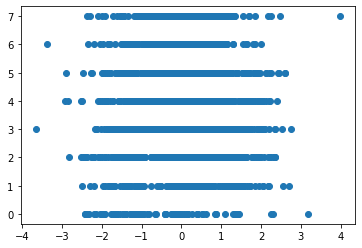

In [137]:
# Confirming the distribution of the target variable.

plt.plot(norm, female_df['tvtot'], 'o') 
plt.show() 

_Running a Statistical Test_

Because the target variable isn't normally distributed, I'll use a non-paramteric test.

In [138]:
# Running the Kruskal-Wallis test.

# Print the test statistic followed by the probability of getting this result if the groups were not different.
stats.kruskal(male_df['tvtot'], female_df['tvtot'])

KruskalResult(statistic=4.627160103901925, pvalue=0.031469611809713985)

_Conclusions_

On average, females watch more TV than males and the difference in time spent watching TV is statistically significant.

### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

_Looking at the Data for People Living with Partners_

In [123]:
partner_df = no_nulls_df[['year', 'pplfair', 'partner']]

In [124]:
# Dropping the year 2014.

index_names = partner_df[partner_df['year'] == 7].index

partner_df.drop(index_names, inplace=True)

In [125]:
# Dropping people that don't live with a partner from the dataframe.

index_names = partner_df[partner_df['partner'] == 2].index

partner_df.drop(index_names, inplace=True)

In [126]:
partner_df.describe()

,year,pplfair,partner
count,2681.0,2681.000000,2681.0
mean,6.0,6.082432,1.0
std,0.0,2.111516,0.0
min,6.0,0.000000,1.0
25%,6.0,5.000000,1.0
50%,6.0,7.000000,1.0
75%,6.0,8.000000,1.0
max,6.0,10.000000,1.0


In [141]:
# Making a standard normally distributed variable.
norm = np.random.normal(0, 1, 2681)

# Sorting the values in ascending order.
norm.sort()

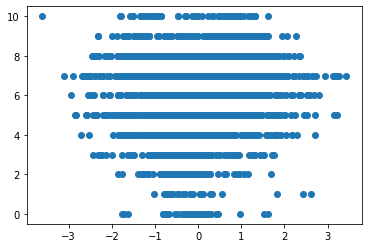

In [142]:
# Confirming the distribution of the target variable.

plt.plot(norm, partner_df['pplfair'], 'o') 
plt.show() 

_Finding Descriptive Statistics for People Living Alone_

In [127]:
lives_alone_df = no_nulls_df[['year', 'pplfair', 'partner']]

In [128]:
# Dropping the year 2014.

index_names = lives_alone_df[lives_alone_df['year'] == 7].index

lives_alone_df.drop(index_names, inplace=True)

In [129]:
# Dropping people that don't live with a partner from the dataframe.

index_names = lives_alone_df[lives_alone_df['partner'] == 1].index

lives_alone_df.drop(index_names, inplace=True)

In [130]:
lives_alone_df.describe()

,year,pplfair,partner
count,1616.0,1616.000000,1616.0
mean,6.0,5.857673,2.0
std,0.0,2.156890,0.0
min,6.0,0.000000,2.0
25%,6.0,5.000000,2.0
50%,6.0,6.000000,2.0
75%,6.0,7.000000,2.0
max,6.0,10.000000,2.0


In [145]:
# Making a standard normally distributed variable.
norm = np.random.normal(0, 1, 1616)

# Sorting the values in ascending order.
norm.sort()

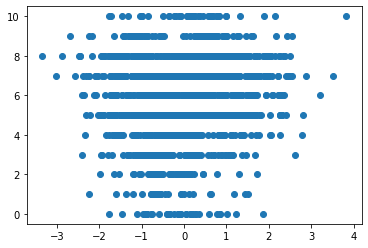

In [146]:
# Confirming the distribution of the target variable.

plt.plot(norm, lives_alone_df['pplfair'], 'o') 
plt.show() 

_Statistical Testing_

In [147]:
# Running the Kruskal-Wallis test.

# Print the test statistic followed by the probability of getting this result if the groups were not different.
stats.kruskal(partner_df['pplfair'], lives_alone_df['pplfair'])

KruskalResult(statistic=14.02005857012386, pvalue=0.00018087084877865917)

_Conclusions_

In 2012, people who lived with a partner were more likely to believe that people treated them fairly than people who lived alone.

### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

_Looking at the Data for Spain_

In [148]:
spain_df = no_nulls_df[['cntry', 'year', 'sclmeet']]

In [149]:
# Dropping the year 2012.

index_names = spain_df[spain_df['year'] == 6].index

spain_df.drop(index_names, inplace=True)

In [151]:
# Dropping countries that aren't Spain.

index_names = spain_df[spain_df['cntry'] == 'ES'].index

spain_df.drop(index_names, inplace=True)

In [152]:
spain_df.describe()

,year,sclmeet
count,3084.0,3084.000000
mean,7.0,5.118353
std,0.0,1.420142
min,7.0,1.000000
25%,7.0,4.000000
50%,7.0,5.000000
75%,7.0,6.000000
max,7.0,7.000000


In [162]:
# Making a standard normally distributed variable.
norm = np.random.normal(0, 1, 3084)

# Sorting the values in ascending order.
norm.sort()

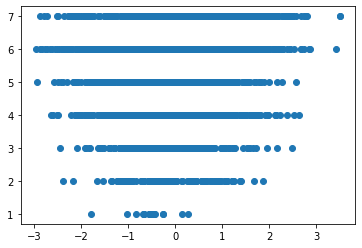

In [163]:
# Confirming the distribution of the target variable.

plt.plot(norm, spain_df['sclmeet'], 'o') 
plt.show() 

_Looking at the Data for Sweden_

In [153]:
sweden_df = no_nulls_df[['cntry', 'year', 'sclmeet']]

In [154]:
# Dropping the year 2012.

index_names = sweden_df[sweden_df['year'] == 6].index

sweden_df.drop(index_names, inplace=True)

In [155]:
# Dropping countries that aren't Sweden.

index_names = sweden_df[sweden_df['cntry'] == 'SE'].index

sweden_df.drop(index_names, inplace=True)

In [156]:
sweden_df.describe()

,year,sclmeet
count,3389.0,3389.000000
mean,7.0,5.087046
std,0.0,1.442659
min,7.0,1.000000
25%,7.0,4.000000
50%,7.0,5.000000
75%,7.0,6.000000
max,7.0,7.000000


In [166]:
# Making a standard normally distributed variable.
norm = np.random.normal(0, 1, 3389)

# Sorting the values in ascending order.
norm.sort()

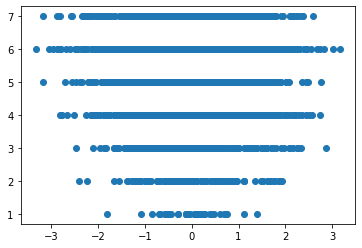

In [167]:
# Confirming the distribution of the target variable.

plt.plot(norm, sweden_df['sclmeet'], 'o') 
plt.show() 

_Looking at the Data for Switzerland_

In [157]:
switzerland_df = no_nulls_df[['cntry', 'year', 'sclmeet']]

In [158]:
# Dropping the year 2012.

index_names = switzerland_df[switzerland_df['year'] == 6].index

switzerland_df.drop(index_names, inplace=True)

In [159]:
# Dropping countries that aren't Switzerland.

index_names = switzerland_df[switzerland_df['cntry'] == 'CH'].index

switzerland_df.drop(index_names, inplace=True)

In [160]:
switzerland_df.describe()

,year,sclmeet
count,3524.0,3524.000000
mean,7.0,5.158059
std,0.0,1.461296
min,7.0,1.000000
25%,7.0,4.000000
50%,7.0,5.000000
75%,7.0,6.000000
max,7.0,7.000000


In [169]:
# Making a standard normally distributed variable.
norm = np.random.normal(0, 1, 3524)

# Sorting the values in ascending order.
norm.sort()

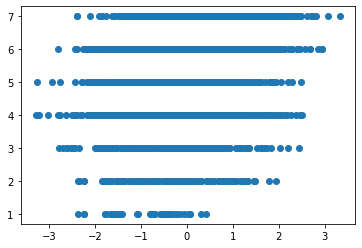

In [170]:
# Confirming the distribution of the target variable.

plt.plot(norm, switzerland_df['sclmeet'], 'o') 
plt.show() 

_Statistical Testing_

In [171]:
# Running the Kruskal-Wallis test.

# Print the test statistic followed by the probability of getting this result if the groups were not different.
stats.kruskal(spain_df['sclmeet'], sweden_df['sclmeet'], switzerland_df['sclmeet'])

KruskalResult(statistic=5.630828079050767, pvalue=0.05987992095278309)

_Conclusion_

Across Spain, Sweden and Switzerland, there wasn't a statistically signficant difference in how often people meet socially.

### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

_Looking at the Data for Spain_

In [173]:
spain_df = no_nulls_df[['cntry', 'year', 'sclact']]

In [175]:
# Dropping the year 2012.

index_names = spain_df[spain_df['year'] == 6].index

spain_df.drop(index_names, inplace=True)

In [176]:
# Dropping countries that aren't Spain.

index_names = spain_df[spain_df['cntry'] == 'ES'].index

spain_df.drop(index_names, inplace=True)

In [177]:
spain_df.describe()

,year,sclact
count,3084.0,3084.000000
mean,7.0,2.813230
std,0.0,0.863807
min,7.0,1.000000
25%,7.0,2.000000
50%,7.0,3.000000
75%,7.0,3.000000
max,7.0,5.000000


In [179]:
# Making a standard normally distributed variable.
norm = np.random.normal(0, 1, 3084)

# Sorting the values in ascending order.
norm.sort()

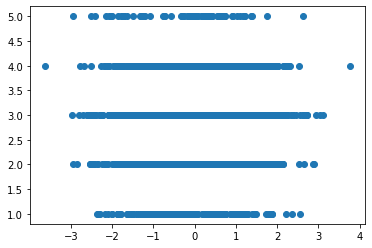

In [180]:
# Confirming the distribution of the target variable.

plt.plot(norm, spain_df['sclact'], 'o') 
plt.show() 

_Looking at the Data for Sweden_

In [181]:
sweden_df = no_nulls_df[['cntry', 'year', 'sclact']]

In [183]:
# Dropping the year 2012.

index_names = sweden_df[sweden_df['year'] == 6].index

sweden_df.drop(index_names, inplace=True)

In [184]:
# Dropping countries that aren't Sweden.

index_names = sweden_df[sweden_df['cntry'] == 'SE'].index

sweden_df.drop(index_names, inplace=True)

In [185]:
sweden_df.describe()

,year,sclact
count,3389.0,3389.000000
mean,7.0,2.728238
std,0.0,0.896785
min,7.0,1.000000
25%,7.0,2.000000
50%,7.0,3.000000
75%,7.0,3.000000
max,7.0,5.000000


In [187]:
# Making a standard normally distributed variable.
norm = np.random.normal(0, 1, 3389)

# Sorting the values in ascending order.
norm.sort()

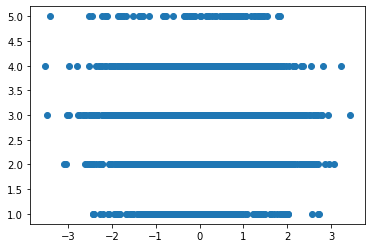

In [188]:
# Confirming the distribution of the target variable.

plt.plot(norm, sweden_df['sclact'], 'o') 
plt.show() 

_Looking at the Data for Switzerland_

In [189]:
switzerland_df = no_nulls_df[['cntry', 'year', 'sclact']]

In [190]:
# Dropping the year 2012.

index_names = switzerland_df[switzerland_df['year'] == 6].index

switzerland_df.drop(index_names, inplace=True)

In [194]:
# Dropping countries that aren't Switzerland.

index_names = switzerland_df[switzerland_df['cntry'] == 'CH'].index

switzerland_df.drop(index_names, inplace=True)

In [195]:
switzerland_df.describe()

,year,sclact
count,2616.0,2616.000000
mean,7.0,2.711774
std,0.0,0.892860
min,7.0,1.000000
25%,7.0,2.000000
50%,7.0,3.000000
75%,7.0,3.000000
max,7.0,5.000000


In [197]:
# Making a standard normally distributed variable.
norm = np.random.normal(0, 1, 2616)

# Sorting the values in ascending order.
norm.sort()

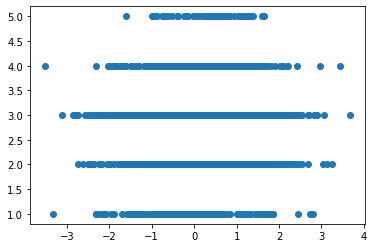

In [198]:
# Confirming the distribution of the target variable.

plt.plot(norm, switzerland_df['sclact'], 'o') 
plt.show() 

_Statistical Testing_

In [199]:
# Running the Kruskal-Wallis test.

# Print the test statistic followed by the probability of getting this result if the groups were not different.
stats.kruskal(spain_df['sclact'], sweden_df['sclact'], switzerland_df['sclact'])

KruskalResult(statistic=20.99684916319543, pvalue=2.7579864968689235e-05)

_Conclusions_

There was a statistically signficant difference across how much people met socially in each country. 

On average, Spain had the highest number of people who participated in Social activites while Switzerland had the lowest number of people.